<a href="https://colab.research.google.com/github/Laviniamadeira/TelecomX_parte2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [166]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

#Preparação de dados


In [167]:
dados = pd.read_csv(f'/content/dados_limpos.csv', engine = 'python')

In [168]:
dados.head()

,id_cliente,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total,contas_diarias
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.0,2.186667
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0,1.996667
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0,2.463333
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0,3.266667
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0,2.796667


In [169]:
#Remocão de colunas irrelevantes
dados = dados.drop(columns=['id_cliente'])
dados.head()

,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_online,metodo_pagamento,custo_mensal,custo_total,contas_diarias
0,0,0,0,1,1,9,1,0,DSL,No,...,0,1,1,0,One year,1,Mailed check,65.6,593.0,2.186667
1,0,1,0,0,0,9,1,1,DSL,No,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.0,1.996667
2,1,1,0,0,0,4,1,0,Fiber optic,No,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.0,2.463333
3,1,1,1,1,0,13,1,0,Fiber optic,No,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.0,3.266667
4,1,0,1,1,0,3,1,0,Fiber optic,No,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.0,2.796667


In [170]:
# Primeiramente, identificamos as colunas categóricas
categorical_cols = [ 'servico_internet',
    'seguranca_online', 'tipo_contrato',
    'metodo_pagamento'
]

# Aplicando one-hot encoding
dados_encoded = pd.get_dummies(dados, columns=categorical_cols, drop_first=True)


In [171]:
bool_cols = dados_encoded.select_dtypes(include='bool').columns  # seleciona colunas booleanas

# converter True/False em 0/1
dados_encoded[bool_cols] = dados_encoded[bool_cols].astype(int)

# Visualiza o resultado
dados_encoded.head()

,cancelamento,genero,idoso,possui_conjuge,possui_dependentes,meses_como_cliente,servico_telefonico,multiplas_linhas,backup_online,protecao_dispositivo,...,contas_diarias,servico_internet_Fiber optic,servico_internet_No,seguranca_online_No internet service,seguranca_online_Yes,tipo_contrato_One year,tipo_contrato_Two year,metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,0,0,0,1,1,9,1,0,1,0,...,2.186667,0,0,0,0,1,0,0,0,1
1,0,1,0,0,0,9,1,1,0,0,...,1.996667,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,4,1,0,0,1,...,2.463333,1,0,0,0,0,0,0,1,0
3,1,1,1,1,0,13,1,0,1,1,...,3.266667,1,0,0,0,0,0,0,1,0
4,1,0,1,1,0,3,1,0,0,0,...,2.796667,1,0,0,0,0,0,0,0,1


In [172]:
# Total de clientes
total_clientes = len(dados_encoded)

# Total de cancelamentos
total_cancelamentos = dados_encoded['cancelamento'].sum()

# Proporção de evasão
proporcao_evasao = total_cancelamentos / total_clientes

print(f"Total de clientes: {total_clientes}")
print(f"Total de cancelamentos: {total_cancelamentos}")
print(f"Proporção de evasão: {proporcao_evasao:.2%}")

Total de clientes: 7267
Total de cancelamentos: 1869
Proporção de evasão: 25.72%


#🎯 Correlação e Seleção de Variáveis:

In [173]:
# Calcula a correlação entre todas as colunas numéricas
correlation_matrix = dados_encoded.corr()

# Exibe a correlação com a coluna 'cancelamento' em ordem decrescente
correlation_with_target = correlation_matrix['cancelamento'].sort_values(ascending=False)
print(correlation_with_target)

cancelamento                                1.000000
servico_internet_Fiber optic                0.300949
metodo_pagamento_Electronic check           0.294626
contas_diarias                              0.189866
custo_mensal                                0.189866
fatura_online                               0.186666
idoso                                       0.146733
tv_streaming                                0.062430
filmes_streaming                            0.060586
multiplas_linhas                            0.039343
servico_telefonico                          0.012571
genero                                     -0.009555
protecao_dispositivo                       -0.063452
backup_online                              -0.080163
metodo_pagamento_Mailed check              -0.090061
metodo_pagamento_Credit card (automatic)   -0.131085
possui_conjuge                             -0.148546
suporte_tecnico                            -0.160440
possui_dependentes                         -0.

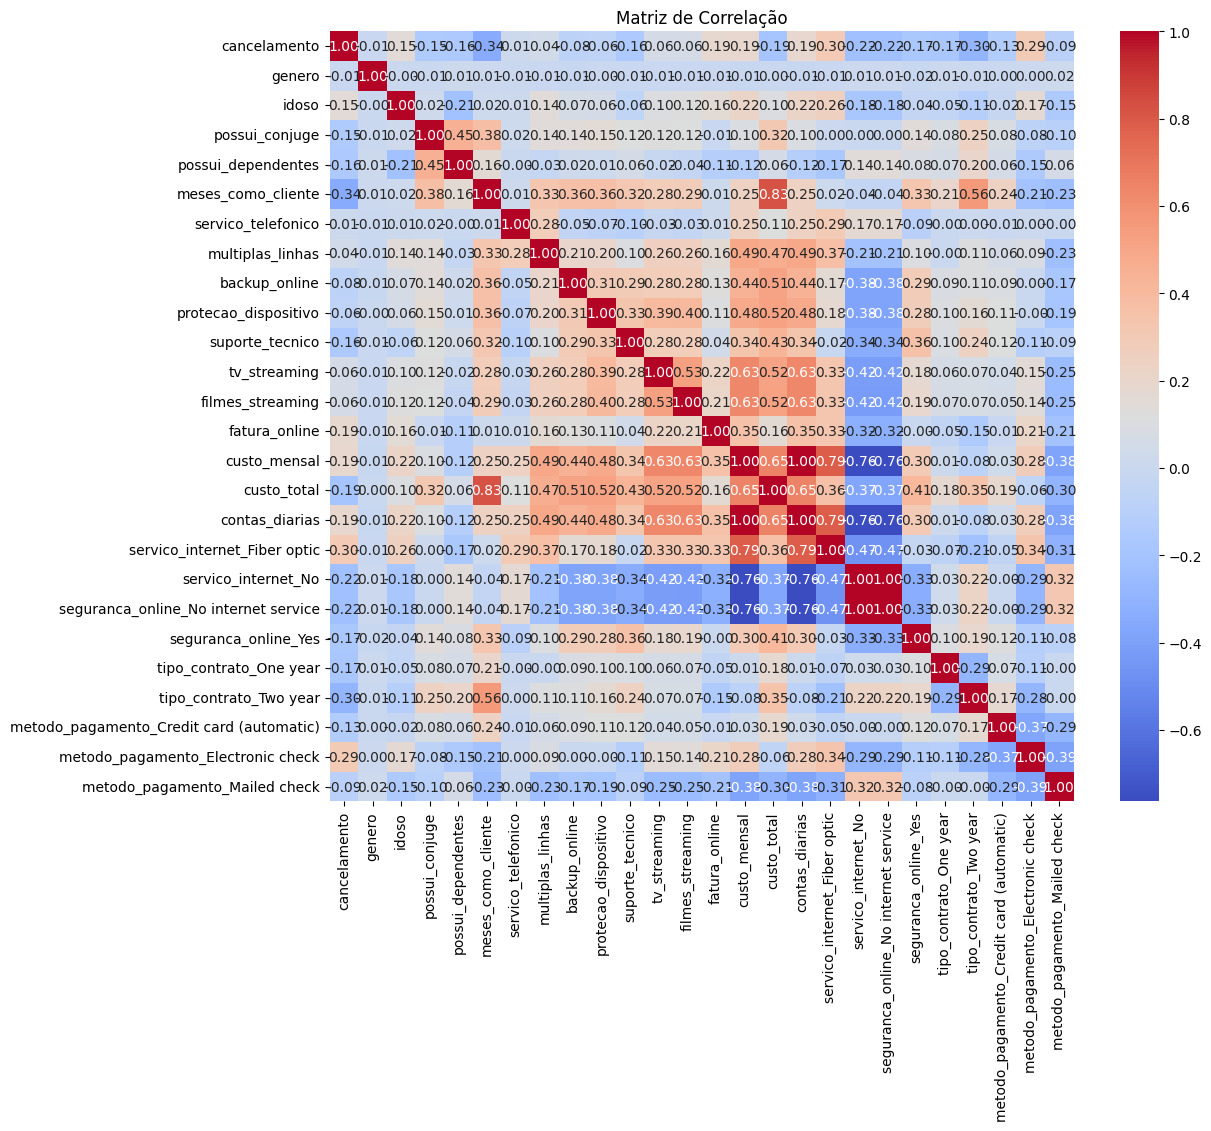

In [174]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()